## Clusters Analysis usando o algoritmo Density-Based Spatial Clustering (DBSCAN)

link: ttps://www.youtube.com/watch?v=eq1zKgCFwkk Case: Implement DBSCAN Clustering and detecting OUTLIERS with Python

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
%matplotlib inline

In [3]:
df = pd.read_csv('cadastro.csv')
df.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3.774819e+12,220,1,2/26/2019 11:28:49,23.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,6571.0,15044.0,FERRARI,355 SPIDER,AFZ6118,4.043254e+13,850,1,2/7/2001 0:00:00,40.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,7006.0,52946.0,NaN,NaN,NaN,6.169523e+13,142,1,8/23/2018 6:42:12,53.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1850.0,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,123.0,580882.0,NaN,NaN,NaN,3.510965e+13,400,1,11/24/2010 10:30:45,26.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            426 non-null    int64  
 1   NUM_CPF               426 non-null    int64  
 2   CHAVE_CONTRATO        426 non-null    int64  
 3   DATA_NASCIMENTO       426 non-null    object 
 4   RENDA_PRESUMIDA       426 non-null    float64
 5   CEP                   426 non-null    int64  
 6   LOGRADOURO            426 non-null    object 
 7   NUMERO                425 non-null    float64
 8   COMPLEMENTO           206 non-null    object 
 9   CEP_A                 426 non-null    int64  
 10  BAIRRO                390 non-null    object 
 11  CIDADE                426 non-null    object 
 12  UF                    426 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [5]:
df.isna().sum()

Unnamed: 0                0
NUM_CPF                   0
CHAVE_CONTRATO            0
DATA_NASCIMENTO           0
RENDA_PRESUMIDA           0
CEP                       0
LOGRADOURO                0
NUMERO                    1
COMPLEMENTO             220
CEP_A                     0
BAIRRO                   36
CIDADE                    0
UF                        0
LATITUDE                 37
LONGITUDE                37
DDD_CELULAR             151
CELULAR                 151
DDD_CELULAR_2           256
CELULAR_2               256
COD_BANCO               118
NUM_AGENCIA             118
NUM_CONTA               118
MARCA_VEICULO           424
MODELO_VEICULO          424
PLACA_VEICULO           424
CNPJ_CREDOR               5
VALOR_DIVIDA              0
STATUS_CONSENTIMENTO      0
DATA_INCLUSAO1            5
IDADE                     5
dtype: int64

In [6]:
df.replace('nan', np.NaN, inplace=True)

In [7]:
df.head()

,Unnamed: 0,NUM_CPF,CHAVE_CONTRATO,DATA_NASCIMENTO,RENDA_PRESUMIDA,CEP,LOGRADOURO,NUMERO,COMPLEMENTO,CEP_A,...,NUM_AGENCIA,NUM_CONTA,MARCA_VEICULO,MODELO_VEICULO,PLACA_VEICULO,CNPJ_CREDOR,VALOR_DIVIDA,STATUS_CONSENTIMENTO,DATA_INCLUSAO1,IDADE
0,1,40977545806,1,25/09/1996,1890000.00,2471020,R AUGUSTO VIANA DE CASTELO,26.0,NaN,2471020,...,NaN,NaN,NaN,NaN,NaN,3.774819e+12,220,1,2/26/2019 11:28:49,23.0
1,2,72544350725,2,10/03/1961,1333890.24,1319001,R MARIA PAULA,201.0,AP 52,1319001,...,6571.0,15044.0,FERRARI,355 SPIDER,AFZ6118,4.043254e+13,850,1,2/7/2001 0:00:00,40.0
2,3,10536099812,3,28/11/1965,22000.00,4323120,R DAS JOIAS,202.0,VL DO,4323120,...,7006.0,52946.0,NaN,NaN,NaN,6.169523e+13,142,1,8/23/2018 6:42:12,53.0
3,4,1471742873,4,02/05/1959,16000.00,4136030,R GUARAREMA,430.0,NaN,4136030,...,1850.0,1103486.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN
4,5,954396332,5,10/11/1984,15929.00,8452105,R JOAO DE SIQUEIRA AFONSO,709.0,CAS,8452105,...,123.0,580882.0,NaN,NaN,NaN,3.510965e+13,400,1,11/24/2010 10:30:45,26.0


In [8]:
df = df[df['LONGITUDE'].notna()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 2 to 423
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            389 non-null    int64  
 1   NUM_CPF               389 non-null    int64  
 2   CHAVE_CONTRATO        389 non-null    int64  
 3   DATA_NASCIMENTO       389 non-null    object 
 4   RENDA_PRESUMIDA       389 non-null    float64
 5   CEP                   389 non-null    int64  
 6   LOGRADOURO            389 non-null    object 
 7   NUMERO                389 non-null    float64
 8   COMPLEMENTO           189 non-null    object 
 9   CEP_A                 389 non-null    int64  
 10  BAIRRO                359 non-null    object 
 11  CIDADE                389 non-null    object 
 12  UF                    389 non-null    object 
 13  LATITUDE              389 non-null    float64
 14  LONGITUDE             389 non-null    float64
 15  DDD_CELULAR           2

In [9]:
df.isna().sum()

Unnamed: 0                0
NUM_CPF                   0
CHAVE_CONTRATO            0
DATA_NASCIMENTO           0
RENDA_PRESUMIDA           0
CEP                       0
LOGRADOURO                0
NUMERO                    0
COMPLEMENTO             200
CEP_A                     0
BAIRRO                   30
CIDADE                    0
UF                        0
LATITUDE                  0
LONGITUDE                 0
DDD_CELULAR             137
CELULAR                 137
DDD_CELULAR_2           232
CELULAR_2               232
COD_BANCO               105
NUM_AGENCIA             105
NUM_CONTA               105
MARCA_VEICULO           388
MODELO_VEICULO          388
PLACA_VEICULO           388
CNPJ_CREDOR               5
VALOR_DIVIDA              0
STATUS_CONSENTIMENTO      0
DATA_INCLUSAO1            5
IDADE                     5
dtype: int64

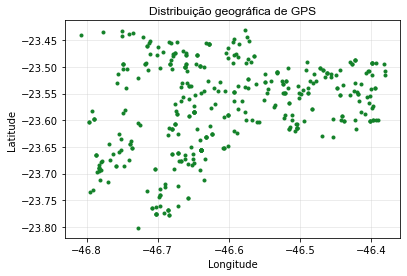

In [10]:
_=plt.plot(df['LONGITUDE'], df['LATITUDE'], marker='.', linewidth=0, color='#128128')
_=plt.grid(which='major', color='#cccccc', alpha=0.45)
_=plt.title('Distribuição geográfica de GPS', family ='Arial', fontsize=12)
_=plt.xlabel('Longitude')
_=plt.ylabel('Latitude')
_=plt.show()

### Selecionando as variáveis segmentadoras

In [11]:
dbscan_df = df[['LONGITUDE', 'LATITUDE']]
dbscan_df = dbscan_df.values.astype('float32', copy=False) 
dbscan_df

array([[-46.639023, -23.65578 ],
       [-46.626034, -23.610065],
       [-46.39493 , -23.539482],
       [-46.588783, -23.623705],
       [-46.671124, -23.625935],
       [-46.68023 , -23.664135],
       [-46.645515, -23.494736],
       [-46.63869 , -23.549086],
       [-46.75756 , -23.53088 ],
       [-46.469555, -23.629314],
       [-46.77918 , -23.67895 ],
       [-46.573086, -23.522884],
       [-46.3992  , -23.491854],
       [-46.5745  , -23.44483 ],
       [-46.660065, -23.495098],
       [-46.41442 , -23.532614],
       [-46.759144, -23.68588 ],
       [-46.442734, -23.59996 ],
       [-46.68577 , -23.62683 ],
       [-46.702984, -23.776804],
       [-46.678818, -23.47873 ],
       [-46.79022 , -23.598352],
       [-46.488083, -23.549376],
       [-46.62404 , -23.626818],
       [-46.632305, -23.630608],
       [-46.64698 , -23.55309 ],
       [-46.649944, -23.672234],
       [-46.438557, -23.601364],
       [-46.60703 , -23.59466 ],
       [-46.62404 , -23.626818],
       [-4

In [12]:
dbscan_df_scaler = StandardScaler().fit(dbscan_df)
dbscan_df = dbscan_df_scaler.transform(dbscan_df)
dbscan_df

array([[-3.00412476e-01, -9.42075312e-01],
       [-1.86288312e-01, -3.98294002e-01],
       [ 1.84421659e+00,  4.41291004e-01],
       [ 1.41001642e-01, -5.60534477e-01],
       [-5.82454920e-01, -5.87056518e-01],
       [-6.62459135e-01, -1.04144788e+00],
       [-3.57457787e-01,  9.73547041e-01],
       [-2.97496527e-01,  3.27057928e-01],
       [-1.34190845e+00,  5.43613017e-01],
       [ 1.18856418e+00, -6.27259314e-01],
       [-1.53184724e+00, -1.21766412e+00],
       [ 2.78922617e-01,  6.38720334e-01],
       [ 1.80671144e+00,  1.00782835e+00],
       [ 2.66487926e-01,  1.56717336e+00],
       [-4.85290229e-01,  9.69236314e-01],
       [ 1.67298007e+00,  5.22989810e-01],
       [-1.35581791e+00, -1.30011165e+00],
       [ 1.42421961e+00, -2.78093964e-01],
       [-7.11125314e-01, -5.97697139e-01],
       [-8.62385929e-01, -2.38163948e+00],
       [-6.50058031e-01,  1.16394305e+00],
       [-1.62884438e+00, -2.58968145e-01],
       [ 1.02577388e+00,  3.23609382e-01],
       [-1.

### parametros 
class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None



In [19]:
modelo = DBSCAN(eps=0.05, min_samples=5, metric='euclidean').\
         fit(dbscan_df)
modelo

DBSCAN(eps=0.05)

In [20]:
# como ficou clusterizado
modelo.labels_

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [21]:
# Quantidade de observações por clusters
clusters = Counter(modelo.labels_)
print(clusters)

Counter({-1: 356, 0: 11, 2: 6, 3: 6, 1: 5, 4: 5})


In [22]:
print('Número de clusters = {}'.format(len(clusters)-1))

Número de clusters = 5


In [23]:
# separando outliers e Clusters
outliers_df = df[modelo.labels_ == -1]
clusters_df = df[modelo.labels_ != -1]

In [24]:
# visualizando outliers
print(df[modelo.labels_ == -1].head(2).T)

                                    3                          4
Unnamed: 0                          4                          5
NUM_CPF                    1471742873                  954396332
CHAVE_CONTRATO                      4                          5
DATA_NASCIMENTO            02/05/1959                 10/11/1984
RENDA_PRESUMIDA               16000.0                    15929.0
CEP                           4136030                    8452105
LOGRADOURO                R GUARAREMA  R JOAO DE SIQUEIRA AFONSO
NUMERO                          430.0                      709.0
COMPLEMENTO                       NaN                        CAS
CEP_A                         4136030                    8452105
BAIRRO                BOSQUE DA SAUDE                    LAJEADO
CIDADE                      SAO PAULO                  SAO PAULO
UF                                 SP                         SP
LATITUDE                   -23.610065                 -23.539483
LONGITUDE                

In [25]:
colors = modelo.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'black'


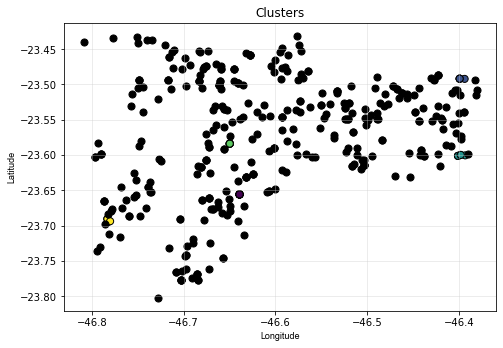

In [26]:
# Gráfico dos clusters
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=colors_outliers, edgecolors='black', s=50)
ax.set_xlabel('Longitude', family = 'Arial', fontsize = 9)
ax.set_ylabel('Latitude', family = 'Arial', fontsize = 9)

plt.title('Clusters')
plt.grid(which='major', color='#cccccc', alpha=0.45)

# E se usarmos o K-Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


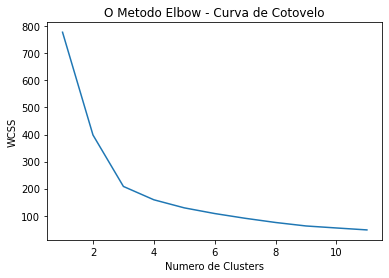

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans


wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dbscan_df)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 12), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [28]:
Modelo_Kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 0   )

Segmentos = Modelo_Kmeans.fit(dbscan_df)
Segmentos


KMeans(n_clusters=4, random_state=0)

In [29]:
Segmentos.cluster_centers_

array([[-1.0320568 , -1.6378442 ],
       [-0.4654688 ,  1.0211914 ],
       [ 1.2305785 ,  0.32770616],
       [-0.469035  , -0.4944868 ]], dtype=float32)

In [30]:
distance = Modelo_Kmeans.fit_transform(dbscan_df)
distance

array([[1.0096523 , 1.9701928 , 1.9890397 , 0.47829804],
       [1.500603  , 1.4466791 , 1.5920389 , 0.2986616 ],
       [3.5490494 , 2.3813717 , 0.6240618 , 2.4953582 ],
       ...,
       [0.5627504 , 2.6429439 , 3.2611535 , 1.397849  ],
       [3.108158  , 0.47811863, 2.2132213 , 1.9555453 ],
       [1.3518403 , 1.6457205 , 1.6775771 , 0.31747425]], dtype=float32)

In [75]:
labels = Modelo_Kmeans.labels_
labels


array([3, 3, 2, 3, 3, 3, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 3, 0, 1, 3,
       2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 0, 3, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 2, 2, 1, 2,
       0, 2, 1, 3, 0, 3, 3, 0, 2, 3, 2, 2, 2, 0, 3, 0, 3, 3, 1, 1, 2, 3,
       2, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 3, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 3, 3, 1, 2, 1, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2,
       1, 3, 3, 2, 1, 3, 2, 3, 0, 0, 3, 0, 3, 1, 1, 1, 3, 0, 2, 2, 0, 2,
       0, 3, 3, 3, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 3, 1, 1, 3, 3, 2, 3, 3,
       0, 3, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 1, 0, 3, 2, 1, 2, 2, 1, 0, 2,
       3, 3, 3, 3, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 2, 3, 3, 1, 2, 1, 2,
       3, 1, 1, 0, 3, 1, 0, 2, 3, 1, 1, 1, 2, 2, 3, 1, 1, 3, 1, 3, 0, 2,
       0, 2, 0, 0, 1, 2, 1, 2, 3, 1, 0, 2, 1, 2, 3, 1, 2, 2, 0, 2, 1, 1,
       2, 3, 2, 2, 3, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 3, 2, 2, 1, 2, 3,
       3, 2, 2, 0, 1, 1, 3, 3, 0, 0, 2, 2, 3, 2, 2,

In [31]:
clusters = Modelo_Kmeans.fit_predict(dbscan_df)

In [32]:
from collections import Counter

Counter(clusters.tolist())


Counter({3: 93, 2: 128, 1: 105, 0: 63})